#Download Data

In [ ]:
#!pip install -U --no-cache-dir gdown --pre
# !pip install --upgrade --no-cache-dir gdown
!gdown --id 17nZsP7_UkGxN6pCzUprP8bTixhA-COkW --output stock_data.xlsx
!gdown --id 1OfbAqkFN3gpTWd-CmRbxfTEXSOkU_JZn --output bda2022_mid_bbs_1921.csv
!gdown --id 1KY0C2wRHZ3zm60EZyOmSIpnYdQupU1Pj --output bda2022_mid_forum_2019.csv
!gdown --id 1eXYFrv9yAkb9YbTR_Q5LeZgodiv5fEdj --output bda2022_mid_forum_2020.csv
!gdown --id 1G-f4q4iteJZQZobQ0Cx3WRJVTMPtmKlw --output bda2022_mid_forum_2021.csv
!gdown --id 1ugJJFEEqCttE9lKjX-TYRsb3gHGCxHDm --output bda2022_mid_news_2019.csv
!gdown --id 1lJa5jjLU-O9B__LA0D0aC2kZqDD7-DMs --output bda2022_mid_news_2020.csv
!gdown --id 1PCqcelrk5VqcCQciaUBocdmAUbDNOPnu --output bda2022_mid_news_2021.csv
!gdown --id 15Ok3Boo00VCj4ru5ZYH-fVGd_fS2FZFE --output backtest_data.xlsx
#!gdown --id 1CSqfLQgEW66Sno9ftCcfcH5265kYVgCD --output selection.csv

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=17nZsP7_UkGxN6pCzUprP8bTixhA-COkW
To: /content/stock_data.xlsx
100% 128M/128M [00:01<00:00, 92.9MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1OfbAqkFN3gpTWd-CmRbxfTEXSOkU_JZn
To: /content/bda2022_mid_bbs_1921.csv
100% 168M/168M [00:02<00:00, 57.4MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading

In [ ]:
#Work2VecOutput
!gdown --id 17HcjcIMsluBVxX_rqsFgW25b8LTLJl-o --output output_down.csv
!gdown --id 1wN-787ZOqLBVBdZXCexF8Fsba2s86Fwx --output output_up.csv

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=17HcjcIMsluBVxX_rqsFgW25b8LTLJl-o
To: /content/output_down.csv
100% 3.02M/3.02M [00:00<00:00, 263MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1wN-787ZOqLBVBdZXCexF8Fsba2s86Fwx
To: /content/output_up.csv
100% 3.98M/3.98M [00:00<00:00, 219MB/s]


In [ ]:
import pandas as pd
import numpy as np

#turn csv to dataframe
#bbs_1921 = pd.read_csv("bda2022_mid_bbs_1921.csv")
#bda2022_mid_forum_2019 = pd.read_csv("bda2022_mid_forum_2019.csv")
#bda2022_mid_forum_2020 = pd.read_csv("bda2022_mid_forum_2020.csv")
#bda2022_mid_forum_2021 = pd.read_csv("bda2022_mid_forum_2021.csv")
bda2022_mid_news_2019 = pd.read_csv("bda2022_mid_news_2019.csv")
bda2022_mid_news_2020 = pd.read_csv("bda2022_mid_news_2020.csv")
bda2022_mid_news_2021 = pd.read_csv("bda2022_mid_news_2021.csv")

#Part 1

In [ ]:
import os
import csv

import numpy as np
from datetime import datetime
import pandas as pd
import json
from collections import Counter

def csv_to_df(path):
    return pd.read_csv(path)


def df_to_csv(df, path):
    df.to_csv(path, encoding='utf_8_sig')


def get_news_df():
    news2019 = csv_to_df('bda2022_mid_news_2019.csv')
    news2020 = csv_to_df('bda2022_mid_news_2020.csv')
    news2021 = csv_to_df('bda2022_mid_news_2021.csv')
    news = pd.concat([news2019, news2020, news2021])
    return news

def phraselst_to_json(phraselist):
    with open('phraselist.json', 'w') as file:
        json.dump(phraselist, file, default=lambda o: o.__dict__, sort_keys=True, indent=4)
        print('Save Phrase List Complete')


def json_to_phraselst(filename='phraselist.json'):
    path = filename
    with open(path, 'r') as file:
        dictlist = json.load(file)
    ret_list = []
    for elm in dictlist:
        ret_list.append(Phrase(**elm))
    print('Load Phrase List Complete')
    return ret_list

In [ ]:
!pip install monpa

     |████████████████████████████████| 8.5 MB 25.1 MB/s 


In [ ]:
import monpa
monpa.use_gpu=True
from monpa import utils
import re

def has_digit(str):
    return bool(re.search(r'\d', str))


def split_sentence_to_phrase(sentence):
    short_sentences = utils.short_sentence(sentence)
    slices = []
    if monpa.use_gpu:
        result_cut_batch = monpa.cut_batch(short_sentences)
        for i in result_cut_batch:
            slices += i
    else:
        for elm in short_sentences:
            slices += monpa.cut(elm)
    return [i.strip(' -') for i in slices if len(i.strip(' -')) >= 2 and not has_digit(i.strip())]

+---------------------------------------------------------------------+
  Welcome to MONPA: Multi-Objective NER POS Annotator for Chinese
+---------------------------------------------------------------------+
已找到 model檔。Found model file.


In [ ]:
import math

class Phrase:
    def __init__(self, **kwargs):
        self.name = None
        # Frequencies
        self.tf_up = None
        self.df_up = None
        self.tf_down = None
        self.df_down = None
        # Numbers
        self.N_up = None
        self.N_down = None
        # Associative
        self.tfidf_up = None
        self.MI_up = None
        self.chisq_up = None
        self.supp_up = None
        self.conf_up = None
        self.lift_up = None

        self.tfidf_down = None
        self.MI_down = None
        self.chisq_down = None
        self.supp_down = None
        self.conf_down = None
        self.lift_down = None

        # Update
        self.__dict__.update(kwargs)
        self.tf_all = self.tf_up + self.tf_down
        self.df_all = self.df_up + self.df_down
        self.N_all = self.N_up + self.N_down
        for elm in ['up', 'down']:
            # self.calc_MI(elm)
            self.calc_tfidf(elm)
            # self.calc_assocs(elm)
            # self.calc_chisq(elm)

    def calc_MI(self, lmttyp):
        # MI = log(N(XY) / (N(X)N(Y)), belongs to df
        if lmttyp == 'up':
            self.MI_up = math.log((self.df_up + 1e-4) / (self.N_up * self.df_all))
        elif lmttyp == 'down':
            self.MI_down = math.log((self.df_down + 1e-4) / (self.N_down * self.df_all))

    def calc_tfidf(self, lmttyp):
        # tf-idf = (1+log(tf)) * log(N_all/df) ???
        N_tmp = self.N_up if lmttyp == 'up' else self.N_down
        if lmttyp == 'up':
            self.tfidf_up = (1 + math.log(self.tf_up + 1e-4)) * math.log(self.N_all / self.df_all)
        elif lmttyp == 'down':
            self.tfidf_down = (1 + math.log(self.tf_down + 1e-4)) * math.log(self.N_all / self.df_all)

    def calc_assocs(self, lmttyp):
        # Support P(XY) = N(XY)/N_all
        # Confidence(X->Y) P(Y|X) = P(XY)/P(X) = N(XY)/N(X)
        # Lift P(XY)/(P(X)P(Y)) = N_all*N(XY)/(N(X)N(Y))
        # Feature (X) -> up or down (Y)
        if lmttyp == 'up':
            self.supp_up = self.df_up / self.N_all
            self.conf_up = self.df_up / self.df_all
            self.lift_up = (self.N_all * self.df_up) / (self.df_all * self.N_up)
        elif lmttyp == 'down':
            self.supp_down = self.df_down / self.N_all
            self.conf_down = self.df_down / self.df_all
            self.lift_down = (self.N_all * self.df_down) / (self.df_all * self.N_down)

    def calc_chisq(self, lmttyp):
        if lmttyp == 'up':
            expected = self.df_all * self.N_up / self.N_all
            self.chisq_up = (1 if self.df_up > expected else -1) * (self.df_up - expected) ** 2 / expected
        elif lmttyp == 'down':
            expected = self.df_all * self.N_down / self.N_all
            self.chisq_down = (1 if self.df_down > expected else -1) * (self.df_down - expected) ** 2 / expected

    def __str__(self):
        '''frqstr = 'Phrase:{}\nUP: tf={}, df={} / {}\nDN: tf={}, df={} / {}\nALL: tf={}, df={} / {}\n' \
            .format(self.name, self.tf_up, self.df_up, self.N_up, self.tf_down, self.df_down, self.N_down, self.tf_all,
                    self.df_all, self.N_all)
        ascstr = 'UP: MI={:.3f}, tfidf={:.3f}, support={:.3f}, confidence={:.3f}, lift={:.3f}, CHISQ={:.3f}\nDN: MI={:.3f}, tfidf={:.3f}, support={:.3f}, confidence={:.3f}, lift={:.3f}, CHISQ={:.3f}' \
            .format(self.MI_up, self.tfidf_up, self.supp_up, self.conf_up, self.lift_up, self.chisq_up,
                    self.MI_down, self.tfidf_down, self.supp_down, self.conf_down, self.lift_down, self.chisq_down)
        return frqstr + ascstr + '\n' + '_'*30 + '\n'''
        frqstr = 'Phrase:{}\nUP: tf={}, df={}, tfidf={}/ {}\nDN: tf={}, df={}, tfidf={} / \nALL: tf={}, df={} / {}\n' \
            .format(self.name, self.tf_up, self.df_up, self.tfidf_up, self.N_up,
                    self.tf_down, self.df_down, self.tfidf_down, self.N_down,
                    self.tf_all, self.df_all, self.N_ttl)

        return frqstr + '\n' + '-' * 30



In [ ]:
import copy

class Phraselst:
    def __init__(self, filename='phraselist', key=None, nums=1000, **kwargs):
        self.phraselst = json_to_phraselst('{}.json'.format(filename))
        self.key = key
        self.filter(**kwargs)
        self.sort_phraselst(self.key)
        # self.namelst = [i.name for i in self.phraselst]
        self.crop(nums)

    def filter(self, **kwargs):
        for key, val in kwargs.items():
            self.phraselst = [i for i in self.phraselst if i.__dict__[key] >= val]
        return self.phraselst

    def crop(self, nums=1000):
        self.phraselst = self.phraselst[0:nums]

    def sort_phraselst(self, fun):
        self.phraselst.sort(key=fun, reverse=True)

    def get_namelst(self):
        return [i.name for i in self.phraselst]

    def show_phrases(self, nums=100, compact=True):
        cnt = 0
        for idx, elm in enumerate(self.phraselst[0:nums]):
            if compact:
                print('{}'.format(elm.name), end='、')
                if cnt == 9:
                    cnt = 0
                    print('')
                else:
                    cnt += 1
            else:
                print('{} {}'.format(idx, elm))
        if nums < len(self.phraselst): print('...Omitting {} elements'.format(len(self.phraselst) - nums))
        print('Total {} elements'.format(len(self.phraselst)))

    def __sub__(self, other):  # exclde
        ret_phraselst = copy.copy(self)
        ret_phraselst.phraselst = [i for i in ret_phraselst.phraselst if
                                   i.name not in [j.name for j in other.phraselst]]  # other.namelst
        return ret_phraselst

    def __add__(self, other):
        ret_phraselst = copy.copy(self)
        ret_phraselst.phraselst = self.phraselst + other.phraselst
        return ret_phraselst



In [ ]:
!pip install monpa
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
from collections import Counter
import pandas as pd
import os
import datetime


class Screener:
    def __init__(self, from_scratch=False):
        self.finance_related = ['彰銀', '京城銀', '台中銀', '旺旺保', '華票', '台產', '臺企銀', '高雄銀', '高雄銀甲特', '聯邦銀', '聯邦銀甲特', '遠東銀',
                                '安泰銀', '新產', '中再保', '第一保', '統一證', '三商壽', '華南金', '富邦金',
                                '富邦特', '國泰金', '國泰特', '開發金', '玉山金', '元大金', '兆豐金', '台新金', '台新戊特', '新光金', '國票金', '永豐金',
                                '中信金', '第一金', '王道銀', '上海商銀', '合庫金', '群益證', '群益期']

        self.strict_bound = ['金融', '金控']
        self.up_kwd = ['漲', '反彈', '揚', '買壓']
        self.down_kwd = ['跌', '失守', '觀望', '保守', '緩', '賣壓', '挫']
        self.mutual_forb = ['震盪', '止', '抗', '整理']

        self.up_news = None
        self.down_news = None
        self.phraselst = None

        self.news_df = get_news_df()
        if from_scratch:
            self.gen_filtered_news()
            self.slice_each_news()
        self.gen_vectors_each_news()

    def news_filter(self, news, kws, prohs, cstl=True, csct=True):
        def check(title, content, keywords, prohibits, cons_tl=True, cons_ct=True):
            string = ''
            if cons_tl: string += title
            if cons_ct and isinstance(content, str): string += content

            for i in keywords:
                if i in string:
                    if prohibits is not None:
                        for j in prohibits:
                            if j in string:
                                return False
                    return True
                else:
                    continue
            return False

        filtered = []
        for idx, line in tqdm(news.iterrows()):
            # string = line['title']
            # if isinstance(line['content'], str): string+= line['content']
            # if checkfinance(string): filtered.append(line)
            if check(line['title'], line['content'], kws, prohs, cons_tl=cstl, cons_ct=csct): filtered.append(line)

        if len(filtered) != 0:
            ret_news = pd.concat(filtered, axis=1)
            ret_news = ret_news.T
            return ret_news
        else:
            return None

    def gen_filtered_news(self):
        news = self.news_filter(self.news_df, self.finance_related, None)
        news.to_csv('filtered_0.csv', encoding='utf_8_sig')
        news = self.news_filter(news, self.strict_bound, None)
        news.to_csv('filtered_1.csv', encoding='utf_8_sig')
        self.up_news = self.news_filter(news, self.up_kwd, self.down_kwd + self.mutual_forb, csct=False)
        self.down_news = self.news_filter(news, self.down_kwd, self.up_kwd + self.mutual_forb, csct=False)
        self.up_news.to_csv('filtered_up.csv', encoding='utf_8_sig')
        self.down_news.to_csv('filtered_down.csv', encoding='utf_8_sig')

    def gen_freqs(self, sub_news):
        tf_ctr = Counter()
        df_ctr = Counter()
        slices_lst = []
        for idx, line in tqdm(sub_news.iterrows()):
            string = line['title']
            if isinstance(line['content'], str): string += line['content']
            slices = split_sentence_to_phrase(string)
            tf_ctr += Counter(slices)
            df_ctr += Counter(set(slices))
            slices_lst.append(slices)

        sub_news['slices'] = slices_lst
        return sub_news, tf_ctr, df_ctr
        # for idx, line in tqdm(sub_news.iterrows):
        #    tf = Counter(slices)
        #    df = Counter(set(slices))

    def slice_each_news(self):
        self.up_news, tf_up_ctr, df_up_ctr = self.gen_freqs(self.up_news)
        self.down_news, tf_down_ctr, df_down_ctr = self.gen_freqs(self.down_news)
        self.phraselst = self.gen_phrase_lst(tf_up_ctr, df_up_ctr, tf_down_ctr, df_down_ctr, len(self.up_news), len(self.down_news))
        phraselst_to_json(self.phraselst)
        self.up_news.to_csv(os.path.join('filtered_up_slices.csv'), encoding='utf_8_sig')
        self.down_news.to_csv(os.path.join('filtered_down_slices.csv'), encoding='utf_8_sig')


    def gen_phrase_lst(self, tf_up_ctr, df_up_ctr, tf_down_ctr, df_down_ctr, N_up, N_down):
        phraselst = []
        df_all_ctr = df_up_ctr + df_down_ctr
        for name, times in df_all_ctr.most_common():
            phraselst.append(Phrase(name=name,
                                    tf_up=tf_up_ctr[name] if name in tf_up_ctr else 0,
                                    df_up=df_up_ctr[name] if name in df_up_ctr else 0,
                                    tf_down=tf_down_ctr[name] if name in tf_down_ctr else 0,
                                    df_down=df_down_ctr[name] if name in df_down_ctr else 0,
                                    N_up=N_up,
                                    N_down=N_down))
        return phraselst



    def gen_vectors_each_news(self):
        up_pl = Phraselst(filename='phraselist', key=lambda x: x.tf_up)
        up_pl.show_phrases()

        down_pl = Phraselst(filename='phraselist', key=lambda x: x.tf_down)
        down_pl.show_phrases()

        up_pl_ex = up_pl - down_pl
        down_pl_ex = down_pl - up_pl
        up_pl_ex.crop(50)
        down_pl_ex.crop(50)
        up_pl_ex.show_phrases()
        down_pl_ex.show_phrases()

        all_pl_ex = up_pl_ex + down_pl_ex
        all_pl_ex.show_phrases()

        vectorizer = TfidfVectorizer(vocabulary=all_pl_ex.get_namelst(), use_idf=True)
        up_dataframe = csv_to_df('filtered_up_slices.csv')
        down_dataframe = csv_to_df('filtered_down_slices.csv')
        all_dataframe = pd.concat([up_dataframe, down_dataframe])
        all_dataframe['type'] = ['up' for i in range(len(up_dataframe))] + ['down' for i in range(len(down_dataframe))]
        all_slices = all_dataframe['slices']


        number = []
        for i in range(len(all_dataframe)):
          number.append(i)
        all_dataframe['number'] = number

        mx = vectorizer.fit_transform(all_slices)


        # filename = 'selection.pkl'
        # all_dataframe.to_pickle(filename)
        # unsolve = pd.read_pickle(filename)

        return all_dataframe, mx.todense()

        # df_to_csv(all_dataframe, os.path.join(pros_pth, 'selection_{}.csv'.format(datetime.datetime.now().strftime('%m%d%H%M'))))
        # from scipy import sparse
        # sparse.save_npz(os.path.join(pros_pth, 'matrix_{}.npz'.format(datetime.datetime.now().strftime('%m%d%H%M'))), mx)



selected_news_df, tfidf_matrix = Screener(from_scratch=True).gen_vectors_each_news()

587392it [00:35, 16568.13it/s]
47251it [00:02, 18825.74it/s]
19410it [00:00, 20826.77it/s]
19410it [00:00, 21616.70it/s]
0it [00:00, ?it/s]/usr/local/lib/python3.7/dist-packages/monpa/crf_layer.py:374: UserWarning: where received a uint8 condition tensor. This behavior is deprecated and will be removed in a future version of PyTorch. Use a boolean condition instead. (Triggered internally at  ../aten/src/ATen/native/TensorCompare.cpp:333.)
  score = torch.where(mask[i].unsqueeze(1), next_score, score)
765it [08:43,  1.46it/s]
578it [06:52,  1.40it/s]


Save Phrase List Complete
Load Phrase List Complete
指數、BR、台股、上漲、市場、表現、外資、持續、股價、漲幅、
類股、美國、台積電、美股、股市、法人、金融、預期、反彈、終場、
族群、大漲、電子、新高、獲利、經濟、資金、震盪、今年、投資、
加上、表示、帶動、金融股、今日、短線、買超、全球、台北、疫情、
行情、目前、營收、加權、走勢、成交量、成長、公司、下跌、其中、
盤勢、影響、操作、觀察、投信、出現、強勢、個股、建議、近期、
維持、超過、今天、鴻海、美元、走高、中國、指出、不過、方面、
半導體、可望、大立光、開高、投資人、可能、收在、貿易、未來、國泰金、
去年、權值股、激勵、產業、分析、基金、政策、大盤、呈現、KY、
高點、季線、以及、拉回、以上、相關、盤面、支撐、相對、台灣、
...Omitting 900 elements
Total 1000 elements
Load Phrase List Complete
BR、指數、台股、市場、下跌、表現、外資、美國、持續、類股、
跌幅、終場、台積電、美股、股市、金融、族群、股價、加上、電子、
今日、上漲、經濟、震盪、法人、影響、預期、疫情、漲幅、賣壓、
其中、全球、成交量、表示、走勢、觀察、金融股、目前、資金、月線、
方面、中國、重挫、今年、短線、鴻海、出現、美元、權值股、投信、
跌破、加權、今天、台北、買超、個股、不過、營收、失守、投資、
獲利、支撐、分別、盤勢、貿易、大立光、傳產、昨日、貿易戰、保守、
操作、季線、盤面、分析、國際、國泰金、反彈、可能、新高、早盤、
壓力、近期、再度、受到、走低、美中、關卡、台灣、作收、半導體、
建議、大盤、大跌、維持、超過、年線、留意、第一、呈現、由於、
...Omitting 900 elements
Total 1000 elements
收益、股份、齊揚、補漲、AI、漲價、轉強、報酬、勁揚、房價、
強漲、作帳、推薦、熱門、落後、根據、ETN、本益、發行、展開、
創新、管理、商機、應用、強彈、具有、續創、高價、成功、吸引、
結論、領漲、方式、完成、決議、買回、主流、成分股、報酬率、反映、
收高、內需、景碩、逼近、上證、聯茂、所以、台廠、旗下、氣勢、
Total 50 elements
下挫、沉重、跌勢、下修、摜破、放緩、跌停

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1323: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  "Upper case characters found in"


Load Phrase List Complete
指數、BR、台股、上漲、市場、表現、外資、持續、股價、漲幅、
類股、美國、台積電、美股、股市、法人、金融、預期、反彈、終場、
族群、大漲、電子、新高、獲利、經濟、資金、震盪、今年、投資、
加上、表示、帶動、金融股、今日、短線、買超、全球、台北、疫情、
行情、目前、營收、加權、走勢、成交量、成長、公司、下跌、其中、
盤勢、影響、操作、觀察、投信、出現、強勢、個股、建議、近期、
維持、超過、今天、鴻海、美元、走高、中國、指出、不過、方面、
半導體、可望、大立光、開高、投資人、可能、收在、貿易、未來、國泰金、
去年、權值股、激勵、產業、分析、基金、政策、大盤、呈現、KY、
高點、季線、以及、拉回、以上、相關、盤面、支撐、相對、台灣、
...Omitting 900 elements
Total 1000 elements
Load Phrase List Complete
BR、指數、台股、市場、下跌、表現、外資、美國、持續、類股、
跌幅、終場、台積電、美股、股市、金融、族群、股價、加上、電子、
今日、上漲、經濟、震盪、法人、影響、預期、疫情、漲幅、賣壓、
其中、全球、成交量、表示、走勢、觀察、金融股、目前、資金、月線、
方面、中國、重挫、今年、短線、鴻海、出現、美元、權值股、投信、
跌破、加權、今天、台北、買超、個股、不過、營收、失守、投資、
獲利、支撐、分別、盤勢、貿易、大立光、傳產、昨日、貿易戰、保守、
操作、季線、盤面、分析、國際、國泰金、反彈、可能、新高、早盤、
壓力、近期、再度、受到、走低、美中、關卡、台灣、作收、半導體、
建議、大盤、大跌、維持、超過、年線、留意、第一、呈現、由於、
...Omitting 900 elements
Total 1000 elements
收益、股份、齊揚、補漲、AI、漲價、轉強、報酬、勁揚、房價、
強漲、作帳、推薦、熱門、落後、根據、ETN、本益、發行、展開、
創新、管理、商機、應用、強彈、具有、續創、高價、成功、吸引、
結論、領漲、方式、完成、決議、買回、主流、成分股、報酬率、反映、
收高、內需、景碩、逼近、上證、聯茂、所以、台廠、旗下、氣勢、
Total 50 elements
下挫、沉重、跌勢、下修、摜破、放緩、跌停、出籠、製造業、萎縮、
加劇、PMI、三王、變數、緊

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1323: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  "Upper case characters found in"


In [ ]:
tfidf_matrix.shape

(1343, 100)

### 讀取預先載好的selected_news

In [ ]:
filename = 'selected_news_df.pkl'
selected_news_df = pd.read_pickle(filename)
selected_news_df

FileNotFoundError: ignored

#word2vec 製造文章向量

In [ ]:
!gdown --id 1CSqfLQgEW66Sno9ftCcfcH5265kYVgCD --output selection.csv

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1CSqfLQgEW66Sno9ftCcfcH5265kYVgCD
To: /content/selection.csv
100% 7.42M/7.42M [00:00<00:00, 84.8MB/s]


In [ ]:
!pip install --upgrade gensim
from gensim.models import word2vec
import numpy as np
import pandas as pd

csv_file = "selection.csv"
csv_data = pd.read_csv(csv_file,header = 0)

selected_news_df = pd.DataFrame(csv_data)
selected_news_df["index"] = [i for i in range(0, selected_news_df.shape[0])]
selected_news_df_up = selected_news_df[selected_news_df["type"] == "up"]
selected_news_df_down = selected_news_df[selected_news_df["type"] == "down"]

def df_to_vec(selected_news_df):
	listdt = selected_news_df['slices'].tolist()
	have=[]
	no=['[']
	for doc in listdt:
		ele=doc.split(",")
		for i in ele:
			vocab=str()
			if i not in no:
				vocab+=i
			have.append(vocab[2:-1])

	with open('slices.txt', 'w',encoding = 'utf-8') as f:
			for item in have:
					f.write("%s\n" % item)

	sentences = word2vec.LineSentence("slices.txt")
	word2vec_model = word2vec.Word2Vec(sentences, vector_size = 250, min_count = 1, window = 5)

	words = list(word2vec_model.wv.index_to_key)
	word_vec = {word:word2vec_model.wv[word] for word in words}

	DocVec = []

	for i in range(len(selected_news_df["slices"])) :
		doc_vec_for_each_sent = np.empty([250], dtype = "float")
		for j in range(len(selected_news_df["slices"].iloc[i])) :
			word = selected_news_df["slices"].iloc[i][j]
			if word in word_vec.keys():
				doc_vec_for_each_sent = np.add(doc_vec_for_each_sent, word_vec[word])

		doc_vec_for_each_sent = np.divide(doc_vec_for_each_sent, len(selected_news_df["slices"].iloc[i]))
		DocVec.append(doc_vec_for_each_sent)
	output_word2vec_df = pd.DataFrame(DocVec)
	normalized = (output_word2vec_df - output_word2vec_df.mean()) / output_word2vec_df.std()

	return normalized

total_vec = df_to_vec(selected_news_df)
down_vec = df_to_vec(selected_news_df_down)
up_vec = df_to_vec(selected_news_df_up)

print(total_vec.shape)

     |████████████████████████████████| 24.1 MB 1.5 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


FileNotFoundError: ignored

#Part 2

##KNN - Word2Vec

In [ ]:
import seaborn as sns
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

In [ ]:
# Word2Vec : Each column represents one feature vector
output_down = down_vec
down_x = output_down.to_numpy()
down_y = [0 for i in range(output_down.shape[0])]

output_up = up_vec
up_x = output_up.to_numpy()
up_y = [1 for i in range(output_up.shape[0])]

total_x = np.concatenate((down_x, up_x), axis = 0 )
total_y = down_y + up_y


訓練集:  1.0
測試集:  1.0
1.00 accuracy with a standard deviation of 0.01


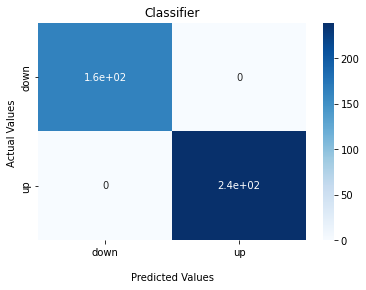

In [ ]:
#X : vector, y: label
X_train, X_test, y_train, y_test = train_test_split(total_x, total_y, test_size = 0.3, random_state = 40)
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train) #data:vectors, label: one-hot encoding
result = knn.predict(X_train)
y_pred = knn.predict(X_test)

print('訓練集: ',knn.score(X_train,y_train))
print('測試集: ',knn.score(X_test,y_test))

#Cross Validation
scores = cross_val_score(knn, total_x, total_y, cv = 10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

#Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Classifier');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['down','up'])
ax.yaxis.set_ticklabels(['down','up'])

## Display the visualization of the Confusion Matrix.
plt.show()

##Random Forest - Word2Vec

In [ ]:
from sklearn import ensemble, preprocessing, metrics
#X : vector, y: label
X_train, X_test, y_train, y_test = train_test_split(total_x, total_y, test_size = 0.2, random_state = 40)

model = ensemble.RandomForestClassifier(n_estimators = 10)
model.fit(X_train, y_train) #data:vectors, label: one-hot encoding

result = model.predict(X_train)
y_pred = model.predict(X_test)

print('訓練集: ',model.score(X_train,y_train))
print('測試集: ',model.score(X_test,y_test))

#Cross Validation
scores = cross_val_score(model, total_x, total_y, cv = 10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

訓練集:  1.0
測試集:  1.0
0.98 accuracy with a standard deviation of 0.06


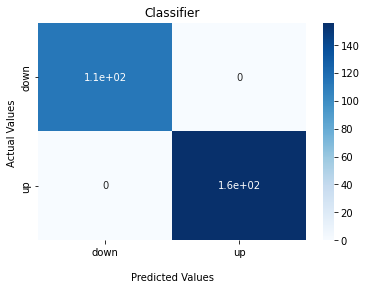

In [ ]:
#Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Classifier');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['down','up'])
ax.yaxis.set_ticklabels(['down','up'])

## Display the visualization of the Confusion Matrix.
plt.show()

##KNN TF-IDF

In [ ]:
# TF-IDF
u = 0
s = 0
for i in range(selected_news_df.shape[0]):
  if selected_news_df["type"].iloc[i] == "up":
    u += 1
  elif selected_news_df["type"].iloc[i] == "down":
    s += 1


In [ ]:
u_s = 0
u_e = u
d_s = u_e
d_e = d_s + s - 1

u_len = u_e - u_s
d_len = d_e - d_s + 1


up_x = [np.array(tfidf_matrix[i]).flatten() for i in range(u_s, u_e)]
up_y = [1 for i in range(u_len)]

down_x = [np.array(tfidf_matrix[i]).flatten() for i in range(d_s, d_e + 1)]
down_y = [0 for i in range(d_len)]


total_x = np.concatenate((down_x, up_x), axis = 0 )
total_y = down_y + up_y

訓練集:  0.7702127659574468
測試集:  0.7121588089330024
0.65 accuracy with a standard deviation of 0.03


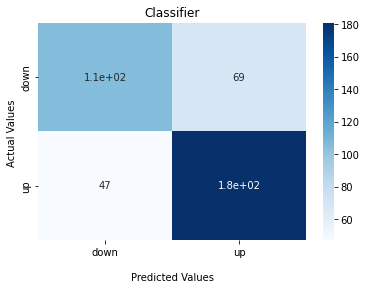

In [ ]:
#X : vector, y: label
X_train, X_test, y_train, y_test = train_test_split(total_x, total_y, test_size = 0.3, random_state = 42)

knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train) #data:vectors, label: one-hot encoding
result = knn.predict(X_train) #[0.1, 0.2, 0.3, 0.4]
y_pred = knn.predict(X_test)

print('訓練集: ',knn.score(X_train,y_train))
print('測試集: ',knn.score(X_test,y_test))

#Cross Validation
scores = cross_val_score(knn, total_x, total_y, cv = 10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

#Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Classifier');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['down','up'])
ax.yaxis.set_ticklabels(['down','up'])

## Display the visualization of the Confusion Matrix.
plt.show()

##Random Forest TF-IDF

(403, 100)
訓練集:  0.9319148936170213
測試集:  0.6947890818858561
0.65 accuracy with a standard deviation of 0.03


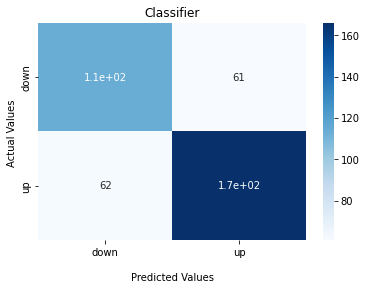

In [ ]:
#X : vector, y: label
X_train, X_test, y_train, y_test = train_test_split(total_x, total_y, test_size = 0.3, random_state = 42)

model = ensemble.RandomForestClassifier(n_estimators = 10)
model.fit(X_train, y_train) #data:vectors, label: one-hot encoding

result = model.predict(X_train)
print(X_test.shape)
y_pred = model.predict(X_test)

print('訓練集: ',model.score(X_train,y_train))
print('測試集: ',model.score(X_test,y_test))

#Cross Validation
scores = cross_val_score(knn, total_x, total_y, cv = 10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

#Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Classifier');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['down','up'])
ax.yaxis.set_ticklabels(['down','up'])

## Display the visualization of the Confusion Matrix.
plt.show()

#Part3

In [ ]:
"""
1. training data : every 3 month
2. testing data : 4th month
3. using the news of D day in 4th month to predict the D + n date -> output
4. using the label data ( if the D + n date of the stcok price goes up/down accordingly ) to verify the buy/sell times and accuracy
5. moving a month forward and redo 1 ~ 4 until reach the end
6. build confusion matrix
"""

'\n1. training data : every 3 month\n2. testing data : 4th month\n3. using the news of D day in 4th month to predict the D + n date -> output\n4. using the label data ( if the D + n date of the stcok price goes up/down accordingly ) to verify the buy/sell times and accuracy\n5. moving a month forward and redo 1 ~ 4 until reach the end\n6. build confusion matrix\n'

In [ ]:
from datetime import datetime, date, timedelta
import calendar
import pandas as pd
from collections import Counter

In [ ]:
def transform_datetime(df):
    try:
      for i in range(df.shape[0]):
          df["post_time"].iloc[i] = datetime.strptime(df["post_time"].iloc[i], '%m/%d/%Y %H:%M') #12/20/2021 14:00
    except:
      pass
    return df

def filtering_data(total_df, testing_year, testing_month ,training_window_size, testing_window_size = 1):
  if testing_month <= 9:
    testing_start = datetime.strptime(str(testing_year) + "-0" +str(testing_month) + "-01", "%Y-%m-%d")
  else:
    testing_start = datetime.strptime(str(testing_year) + "-" +str(testing_month) + "-01", "%Y-%m-%d")

  testing_end = testing_start + pd.DateOffset(months = testing_window_size)
  training_start = (testing_start - pd.DateOffset(months = training_window_size)).timestamp()
  training_start = datetime.fromtimestamp(training_start)
  training_filter = total_df["post_time"].between(training_start, testing_start)
  testing_filter = total_df["post_time"].between(testing_start, testing_end)

  df_training = total_df[training_filter]
  df_testing = total_df[testing_filter]

  return df_training, df_testing

# not used : just demo how knn model can be used
def knn_word2vec(X_train, y_train, X_test):
  knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
  knn.fit(X_train, y_train)
  result = knn.predict(X_train)
  y_pred = knn.predict(X_test)
  return y_pred


df = selected_news_df
df = transform_datetime(df)

#main function
#build model and separated into training and testing
total_prediction = {}
for year in range(2019, 2022):
  if year == 2019:
    init_month = 4
  else:
    init_month = 1

  for month in range(init_month, 13):
      df_training, df_testing = filtering_data(df, year, month,3)
      month_end_date = calendar.monthrange(year, month)[1]
      x_train = []
      y_train = []
      for index in df_training["index"]:
          x_train.append(total_vec.iloc[index])
          filtered_df = df[df["index"] == index]
          if filtered_df["type"].iloc[0] == "up":
            y_train.append(1)
          else:
            y_train.append(0)

      x_train = np.asarray(x_train)
      model = neighbors.KNeighborsClassifier(n_neighbors = 5)
      model.fit(x_train, y_train)

      for day in range(1, month_end_date + 1):
          the_date = date(year, month, day)
          df_testing['post_time_date'] = pd.to_datetime(df_testing['post_time']).dt.date
          day_filter = (df_testing["post_time_date"] == the_date)
          df_the_day = df_testing[day_filter] #filterd df for fed into model

          x_test = []
          for index in df_the_day["index"]:
              x_test.append(total_vec.iloc[index])
          x_test = np.asarray(x_test)

          if x_test.shape[0] == 0:
            continue
          else:
            y_pred = list(model.predict(x_test))

          up_of_a_day = y_pred.count(1)
          down_of_a_day = y_pred.count(0)

          if up_of_a_day > down_of_a_day:
            total_prediction[the_date] = 1

          elif up_of_a_day < down_of_a_day:
            total_prediction[the_date] = 0

          else:
            total_prediction[the_date] = 2


# take last 3 month data to traing model
# take the 4th month data as input to generate output for day D
# As output generated, compare the
# record performance
# record buy/sell

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
print(total_prediction)
up_times = Counter(total_prediction.values())[0]
down_times = Counter(total_prediction.values())[1]
noIdea_times = Counter(total_prediction.values())[2]

nonIdea_ratio = (noIdea_times / sum([up_times, down_times, noIdea_times]))
idea_ratio = 1-nonIdea_ratio
print("UP", up_times)
print("Down", down_times)
print("No idea", noIdea_times)
print("出手比率:", idea_ratio)

{datetime.date(2019, 4, 1): 0, datetime.date(2019, 4, 2): 1, datetime.date(2019, 4, 8): 1, datetime.date(2019, 4, 9): 1, datetime.date(2019, 4, 10): 1, datetime.date(2019, 4, 11): 1, datetime.date(2019, 4, 12): 0, datetime.date(2019, 4, 15): 1, datetime.date(2019, 4, 16): 1, datetime.date(2019, 4, 17): 1, datetime.date(2019, 4, 18): 1, datetime.date(2019, 4, 23): 0, datetime.date(2019, 4, 24): 1, datetime.date(2019, 4, 25): 1, datetime.date(2019, 4, 26): 0, datetime.date(2019, 4, 29): 0, datetime.date(2019, 4, 30): 1, datetime.date(2019, 5, 2): 1, datetime.date(2019, 5, 3): 1, datetime.date(2019, 5, 6): 0, datetime.date(2019, 5, 7): 1, datetime.date(2019, 5, 8): 0, datetime.date(2019, 5, 9): 0, datetime.date(2019, 5, 10): 2, datetime.date(2019, 5, 13): 0, datetime.date(2019, 5, 14): 0, datetime.date(2019, 5, 15): 1, datetime.date(2019, 5, 16): 0, datetime.date(2019, 5, 17): 0, datetime.date(2019, 5, 20): 0, datetime.date(2019, 5, 21): 2, datetime.date(2019, 5, 22): 1, datetime.date(201

In [ ]:
!gdown --id 15Ok3Boo00VCj4ru5ZYH-fVGd_fS2FZFE --output backtest_data.xlsx

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=15Ok3Boo00VCj4ru5ZYH-fVGd_fS2FZFE
To: /content/backtest_data.xlsx
100% 40.2k/40.2k [00:00<00:00, 44.8MB/s]


In [ ]:
pred_pl_series = pd.Series(total_prediction)
actual_pl_df = pd.read_excel("backtest_data.xlsx", index_col=0)

#delete non_idea dates:
pred_pl_series = pred_pl_series[pred_pl_series!=2]

# #Transform indexes to datatime for intersection.
pred_pl_series.index = pd.to_datetime(pred_pl_series.index)
actual_pl_df.index = pd.to_datetime(actual_pl_df.index)
shared_idx = actual_pl_df.index.intersection(pred_pl_series.index)

In [ ]:
pred_pl_series = pred_pl_series[shared_idx]
actual_pl_df = actual_pl_df.loc[shared_idx,:]

In [ ]:
# pred_outcome_series_list = list()
for i in range(10):
  pred_outcome_series = actual_pl_df.iloc[:,i] == pred_pl_series
  # pred_outcome_series_list.append(pred_outcome_series)
  print("Accuracy of {n}th day:".format(n=i), 100*sum(pred_outcome_series) / len(pred_outcome_series), "%")

Accuracy of 0th day: 54.8235294117647 %
Accuracy of 1th day: 57.411764705882355 %
Accuracy of 2th day: 55.294117647058826 %
Accuracy of 3th day: 55.294117647058826 %
Accuracy of 4th day: 55.76470588235294 %
Accuracy of 5th day: 54.11764705882353 %
Accuracy of 6th day: 55.76470588235294 %
Accuracy of 7th day: 56.23529411764706 %
Accuracy of 8th day: 57.64705882352941 %
Accuracy of 9th day: 55.05882352941177 %


0th day:


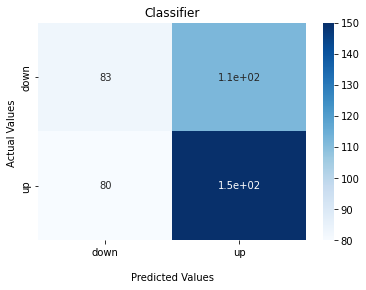

1th day:


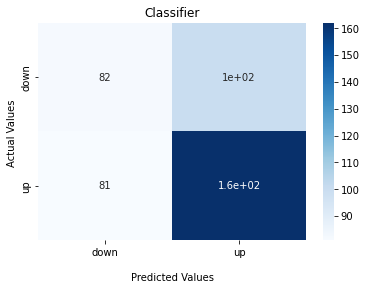

2th day:


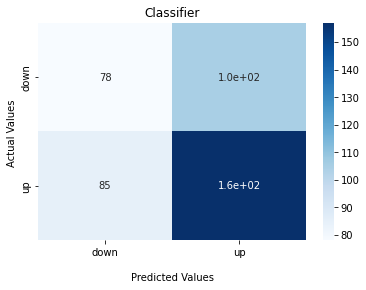

3th day:


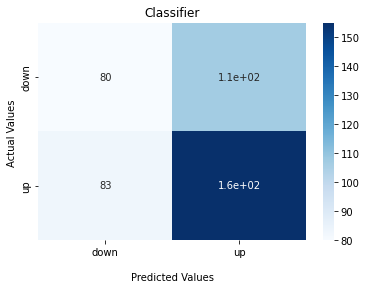

4th day:


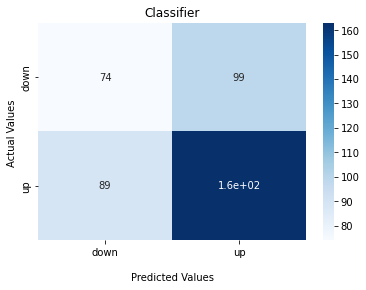

5th day:


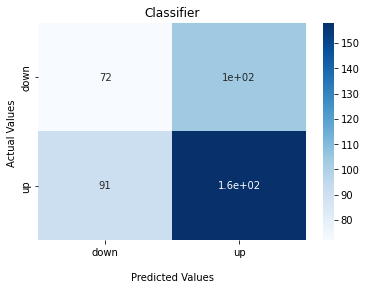

6th day:


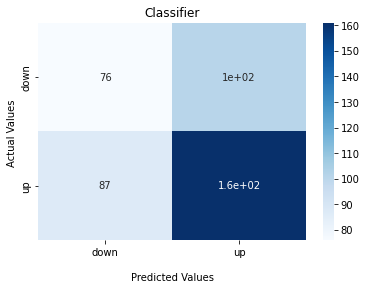

7th day:


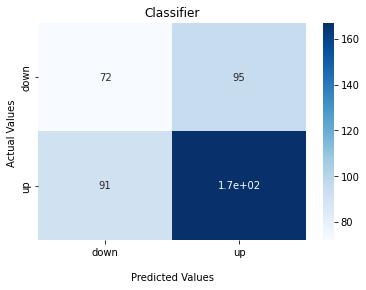

8th day:


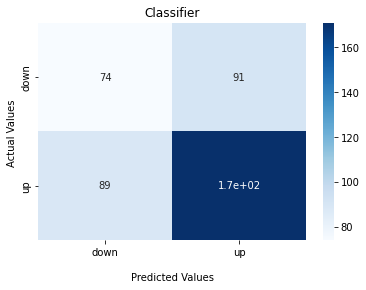

9th day:


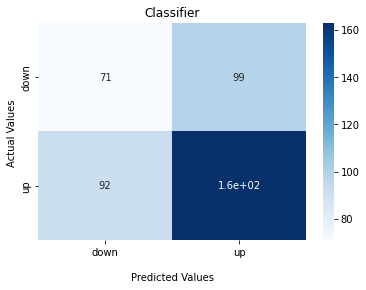

In [ ]:
#Confusion Matrix
for i in range(10):
  print("{n}th day:".format(n=i))
  cf_matrix = confusion_matrix(actual_pl_df.iloc[:,i], pred_pl_series)
  ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
  ax.set_title('Classifier');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['down','up'])
  ax.yaxis.set_ticklabels(['down','up'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()